In [1]:
from icecream import ic
import numpy as np
from skimage.restoration import unwrap_phase
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from miscellaneous.loader import load_image
from miscellaneous.propagator import angular_spectrum_band_limited
from miscellaneous.tie import FFTSolver2D

In [2]:
file = '../../generation/image/BMSTU 1024x1024.png'
phase = load_image(file) + 0.2

In [3]:
i_amplitude = 0.5
intensity = i_amplitude * np.ones(phase.shape)

mean = 0.0
standard_deviation = 0.001
noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_back_propagation = np.sqrt(intensity) * np.exp(1j * phase)

noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_forward_propagation = np.sqrt(intensity) * np.exp(1j * phase)

In [4]:
px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm

distances = np.array([0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.00095, 0.0015, 0.002, 0.0025])
forward_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_forward_propagation)
    forward_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: 1e-05
ic| distance: 5e-05
ic| distance: 0.0001
ic| distance: 0.0002
ic| distance: 0.0005
ic| distance: 0.00095
ic| distance: 0.0015
ic| distance: 0.002
ic| distance: 0.0025


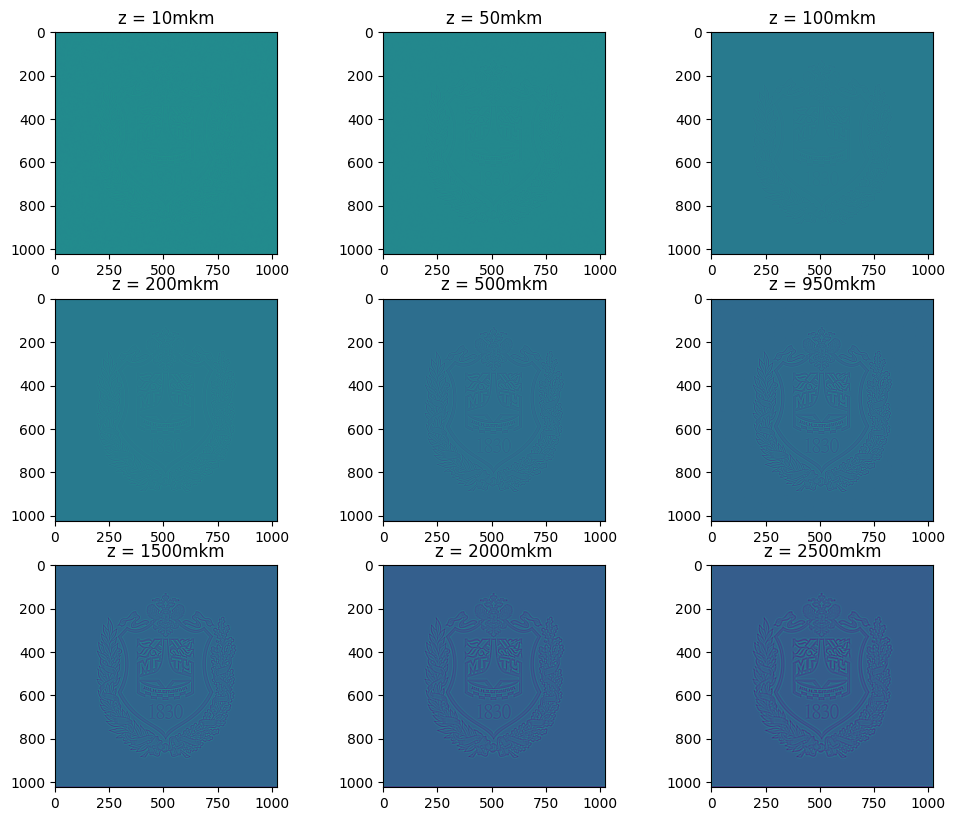

In [5]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(np.abs(forward_propagated_fields[0])**2)
ax_arr[0,0].set_title('z = 10mkm')
ax_arr[0,1].imshow(np.abs(forward_propagated_fields[1])**2)
ax_arr[0,1].set_title('z = 50mkm')
ax_arr[0,2].imshow(np.abs(forward_propagated_fields[2])**2)
ax_arr[0,2].set_title('z = 100mkm')
ax_arr[1,0].imshow(np.abs(forward_propagated_fields[3])**2)
ax_arr[1,0].set_title('z = 200mkm')
ax_arr[1,1].imshow(np.abs(forward_propagated_fields[4])**2)
ax_arr[1,1].set_title('z = 500mkm')
ax_arr[1,2].imshow(np.abs(forward_propagated_fields[5])**2)
ax_arr[1,2].set_title('z = 950mkm')
ax_arr[2,0].imshow(np.abs(forward_propagated_fields[6])**2)
ax_arr[2,0].set_title('z = 1500mkm')
ax_arr[2,1].imshow(np.abs(forward_propagated_fields[7])**2)
ax_arr[2,1].set_title('z = 2000mkm')
ax_arr[2,2].imshow(np.abs(forward_propagated_fields[8])**2)
ax_arr[2,2].set_title('z = 2500mkm')

plt.show()

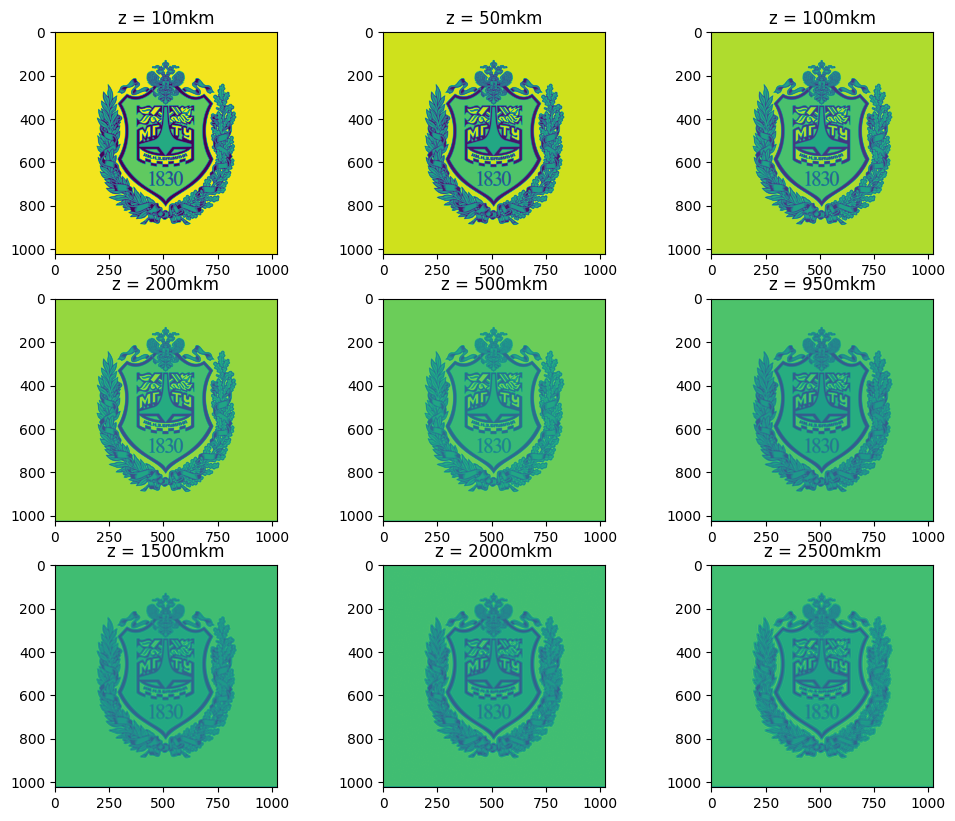

In [6]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[0])))
ax_arr[0,0].set_title('z = 10mkm')
ax_arr[0,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[1])))
ax_arr[0,1].set_title('z = 50mkm')
ax_arr[0,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[2])))
ax_arr[0,2].set_title('z = 100mkm')
ax_arr[1,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[3])))
ax_arr[1,0].set_title('z = 200mkm')
ax_arr[1,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[4])))
ax_arr[1,1].set_title('z = 500mkm')
ax_arr[1,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[5])))
ax_arr[1,2].set_title('z = 950mkm')
ax_arr[2,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[6])))
ax_arr[2,0].set_title('z = 1500mkm')
ax_arr[2,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[7])))
ax_arr[2,1].set_title('z = 2000mkm')
ax_arr[2,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[8])))
ax_arr[2,2].set_title('z = 2500mkm')

plt.show()

In [7]:
distances = np.array([-0.00001, -0.00005, -0.0001, -0.0002, -0.0005, -0.00095, -0.0015, -0.002, -0.0025])
back_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_back_propagation)
    back_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: -1e-05
ic| distance: -5e-05
ic| distance: -0.0001
ic| distance: -0.0002
ic| distance: -0.0005
ic| distance: -0.00095
ic| distance: -0.0015
ic| distance: -0.002
ic| distance: -0.0025


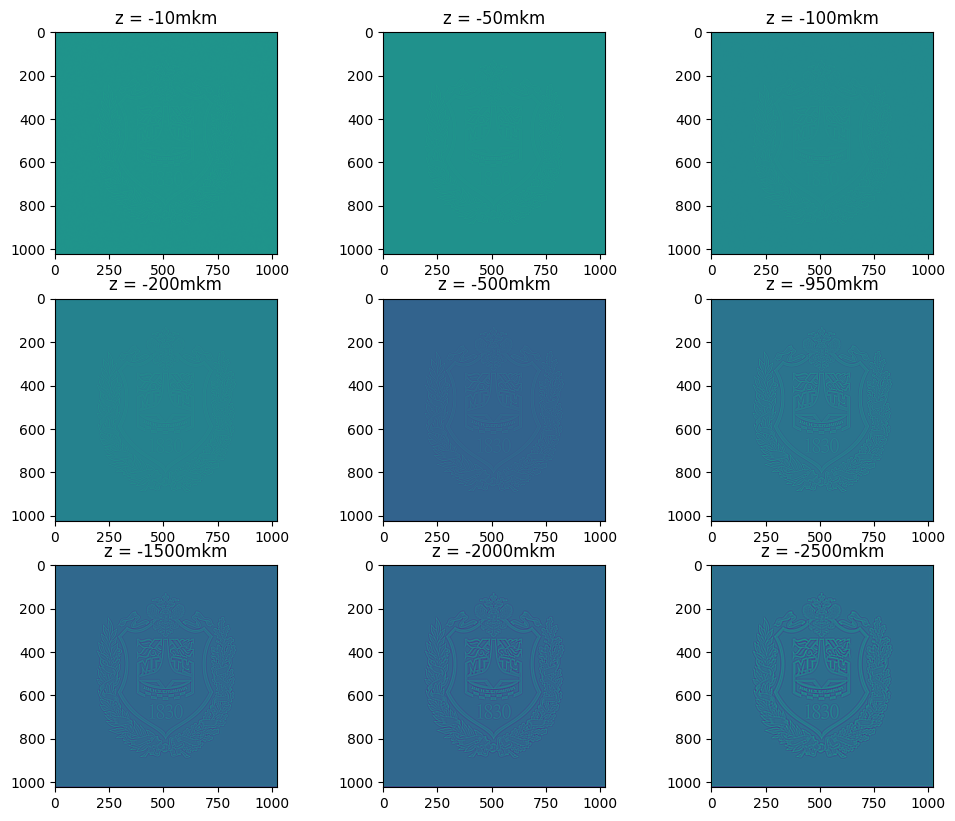

In [8]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(np.abs(back_propagated_fields[0])**2)
ax_arr[0,0].set_title('z = -10mkm')
ax_arr[0,1].imshow(np.abs(back_propagated_fields[1])**2)
ax_arr[0,1].set_title('z = -50mkm')
ax_arr[0,2].imshow(np.abs(back_propagated_fields[2])**2)
ax_arr[0,2].set_title('z = -100mkm')
ax_arr[1,0].imshow(np.abs(back_propagated_fields[3])**2)
ax_arr[1,0].set_title('z = -200mkm')
ax_arr[1,1].imshow(np.abs(back_propagated_fields[4])**2)
ax_arr[1,1].set_title('z = -500mkm')
ax_arr[1,2].imshow(np.abs(back_propagated_fields[5])**2)
ax_arr[1,2].set_title('z = -950mkm')
ax_arr[2,0].imshow(np.abs(back_propagated_fields[6])**2)
ax_arr[2,0].set_title('z = -1500mkm')
ax_arr[2,1].imshow(np.abs(back_propagated_fields[7])**2)
ax_arr[2,1].set_title('z = -2000mkm')
ax_arr[2,2].imshow(np.abs(back_propagated_fields[8])**2)
ax_arr[2,2].set_title('z = -2500mkm')

plt.show()

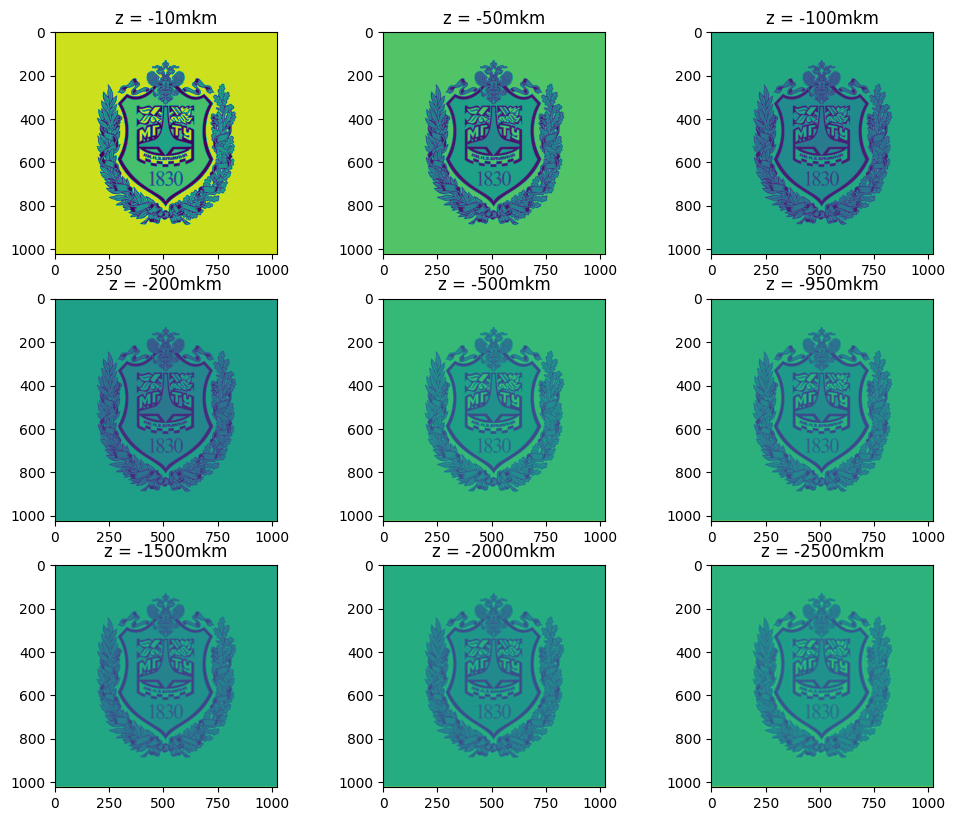

In [9]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(unwrap_phase(np.angle(back_propagated_fields[0])))
ax_arr[0,0].set_title('z = -10mkm')
ax_arr[0,1].imshow(unwrap_phase(np.angle(back_propagated_fields[1])))
ax_arr[0,1].set_title('z = -50mkm')
ax_arr[0,2].imshow(unwrap_phase(np.angle(back_propagated_fields[2])))
ax_arr[0,2].set_title('z = -100mkm')
ax_arr[1,0].imshow(unwrap_phase(np.angle(back_propagated_fields[3])))
ax_arr[1,0].set_title('z = -200mkm')
ax_arr[1,1].imshow(unwrap_phase(np.angle(back_propagated_fields[4])))
ax_arr[1,1].set_title('z = -500mkm')
ax_arr[1,2].imshow(unwrap_phase(np.angle(back_propagated_fields[5])))
ax_arr[1,2].set_title('z = -950mkm')
ax_arr[2,0].imshow(unwrap_phase(np.angle(back_propagated_fields[6])))
ax_arr[2,0].set_title('z = -1500mkm')
ax_arr[2,1].imshow(unwrap_phase(np.angle(back_propagated_fields[7])))
ax_arr[2,1].set_title('z = -2000mkm')
ax_arr[2,2].imshow(unwrap_phase(np.angle(back_propagated_fields[8])))
ax_arr[2,2].set_title('z = -2500mkm')

plt.show()

In [10]:
distances = np.array([0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.00095, 0.0015, 0.002, 0.0025])
retrieved_phases = {}
for dz, i in zip(distances, range(len(distances))):
    ic(dz)
    intensities = [np.abs(field) ** 2 for field in [forward_propagated_fields[i], back_propagated_fields[i]]]

    dz = 2 * dz
    dz = - dz
    threshold = 0.1

    solver = FFTSolver2D(intensities, dz, wavelength, px_size)
    retrieved_phases[-dz] = solver.solve(threshold)

retrieved_phases.keys()

ic| dz: 1e-05
ic| dz: 5e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0005
ic| dz: 0.00095
ic| dz: 0.0015
ic| dz: 0.002
ic| dz: 0.0025


dict_keys([2e-05, 0.0001, 0.0002, 0.0004, 0.001, 0.0019, 0.003, 0.004, 0.005])

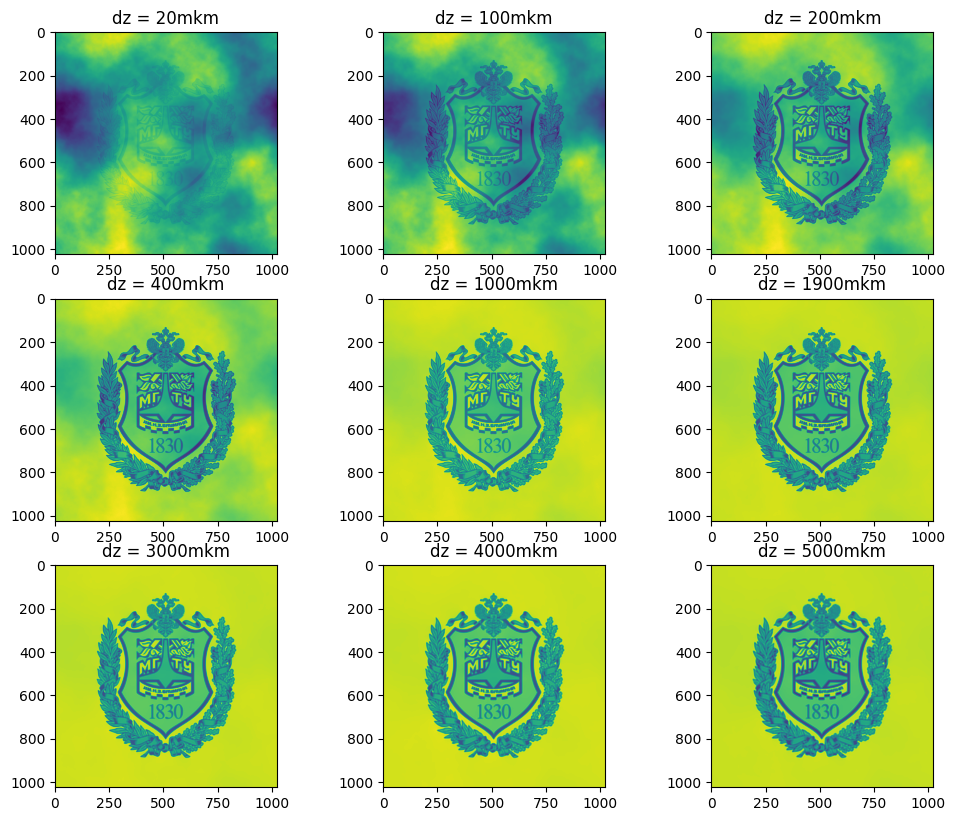

In [11]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(retrieved_phases[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(retrieved_phases[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(retrieved_phases[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(retrieved_phases[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(retrieved_phases[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(retrieved_phases[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(retrieved_phases[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(retrieved_phases[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(retrieved_phases[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [12]:
def find_power(data: np.ndarray, threshold:int=0.01) -> int:
    threshold /= 1000
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j ** 2
            counter = j
        counter = 0
    return power

powers = {}

for dz, phase in retrieved_phases.items():
    powers[dz] = find_power(phase)
    ic(dz, powers[dz])

ic| dz: 2e-05, powers[dz]: 2291027.720955448
ic| dz: 0.0001, powers[dz]: 85078.25426994404
ic| dz: 0.0002, powers[dz]: 44775.47106772456
ic| dz: 0.0004, powers[dz]: 40423.77704183462
ic| dz: 0.001, powers[dz]: 42388.97589288032
ic| dz: 0.0019, powers[dz]: 44014.18225386341
ic| dz: 0.003, powers[dz]: 42406.306340808704
ic| dz: 0.004, powers[dz]: 41425.42713440568
ic| dz: 0.005, powers[dz]: 39912.494083019716


In [14]:
def find_power(data:np.ndarray):
    def calculate_row_power(a):
        th = 0.0001
        row_power = 0
        for i in range(a.size - 1):
            if a[i+1] - a[i] >= th: row_power += a[i+1]**2
        return row_power

    return np.sum(np.apply_along_axis(calculate_row_power, 0, data)) + \
           np.sum(np.apply_along_axis(calculate_row_power, 1, data))

powers = {}

for dz, phase in retrieved_phases.items():
    powers[dz] = find_power(phase)
    ic(dz, powers[dz])

ic| dz: 2e-05, powers[dz]: 2600289.0316127236
ic| dz: 0.0001, powers[dz]: 141433.48514385102
ic| dz: 0.0002, powers[dz]: 72762.46990444428
ic| dz: 0.0004, powers[dz]: 58247.02029276501
ic| dz: 0.001, powers[dz]: 55293.589145118334
ic| dz: 0.0019, powers[dz]: 53103.171382202476
ic| dz: 0.003, powers[dz]: 49313.29810734655
ic| dz: 0.004, powers[dz]: 47112.19042413386
ic| dz: 0.005, powers[dz]: 44987.98125806426


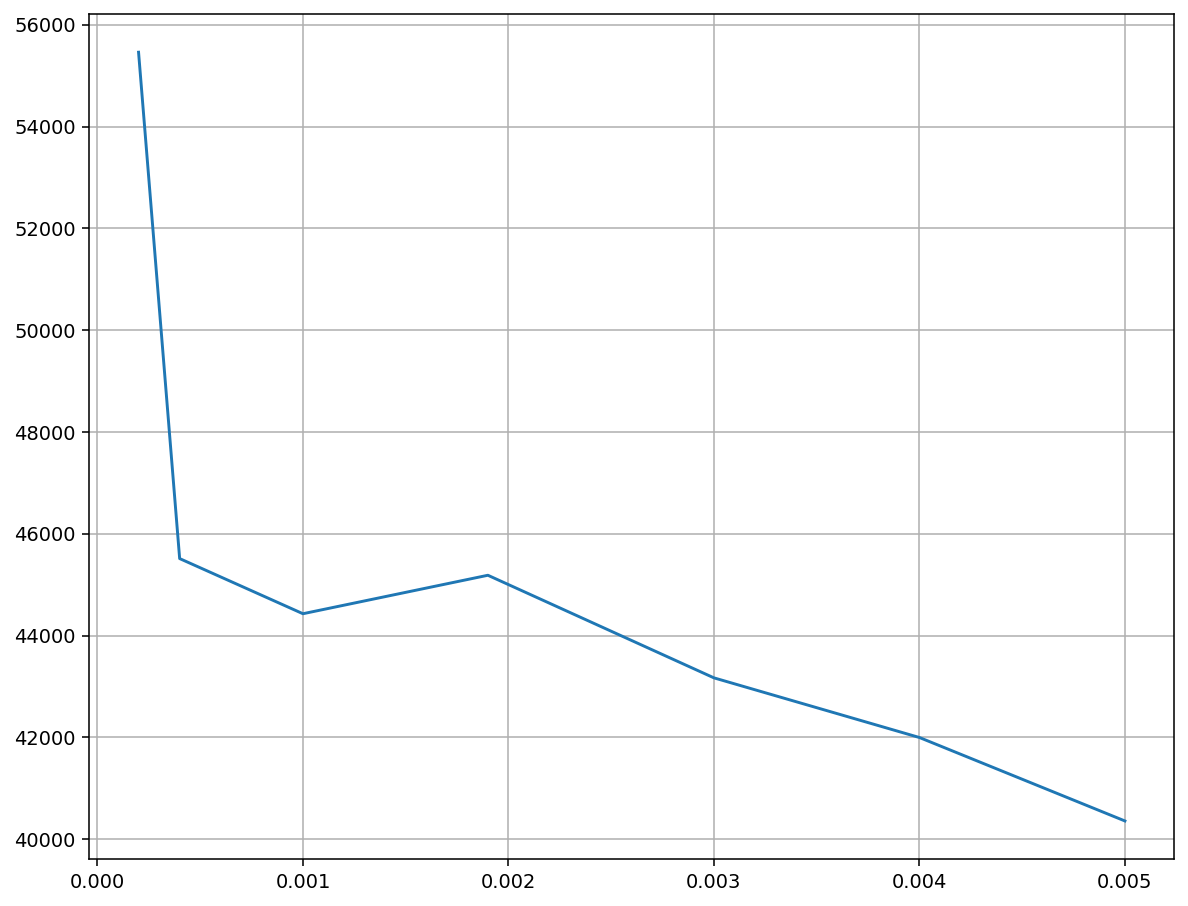

In [51]:
figure(figsize=(10, 8), dpi=140)
plt.plot(powers.keys(), powers.values())
plt.grid()
plt.show()

In [52]:
from scipy.ndimage import convolve

def roberts_matrix(array):
    kernelx = np.array([[-1, 0], [0, 1]])
    kernely = np.array([[0, -1], [1, 0]])

    x = np.abs(convolve(array, kernelx))
    y = np.abs(convolve(array, kernely))

    result = np.sqrt(x ** 2 + y ** 2)
    return result


def sobel_matrix(array):
    kernelx = np.array([
        [+1, 0, -1],
        [+2, 0, -2],
        [+1, 0, -1],
    ])
    kernely = np.array([
        [+1, +2, +1],
        [ 0,  0,  0],
        [-1, -2, -1],
    ])

    x = np.abs(convolve(array, kernelx))
    y = np.abs(convolve(array, kernely))

    result = np.sqrt(x ** 2 + y ** 2)
    return result


def prewitt_matrix(array):
    kernelx = np.array([
        [+1, 0, -1],
        [+1, 0, -1],
        [+1, 0, -1],
    ])
    kernely = np.array([
        [+1, +1, +1],
        [ 0,  0,  0],
        [-1, -1, -1],
    ])

    x = np.abs(convolve(array, kernelx))
    y = np.abs(convolve(array, kernely))

    result = np.sqrt(x ** 2 + y ** 2)
    return result


def laplace_matrix(array, inward=True):
    if inward:
        kernel = np.array([
            [0, +1, 0],
            [1, -4, 1],
            [0, +1, 0],
        ])
    else:
        kernel = np.array([
            [0,  -1, 0],
            [-1, +4, -1],
            [0,  -1, 0],
        ])

    convolved = np.abs(convolve(array, kernel))

    result = np.abs(convolved)
    return result

In [100]:
roberts_convolved = {}

for dz, phase in retrieved_phases.items():
    roberts_convolved[dz] = roberts_matrix(phase) > 0.1
    ic(dz)

ic| dz: 2e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0004
ic| dz: 0.001
ic| dz: 0.0019
ic| dz: 0.003
ic| dz: 0.004
ic| dz: 0.005


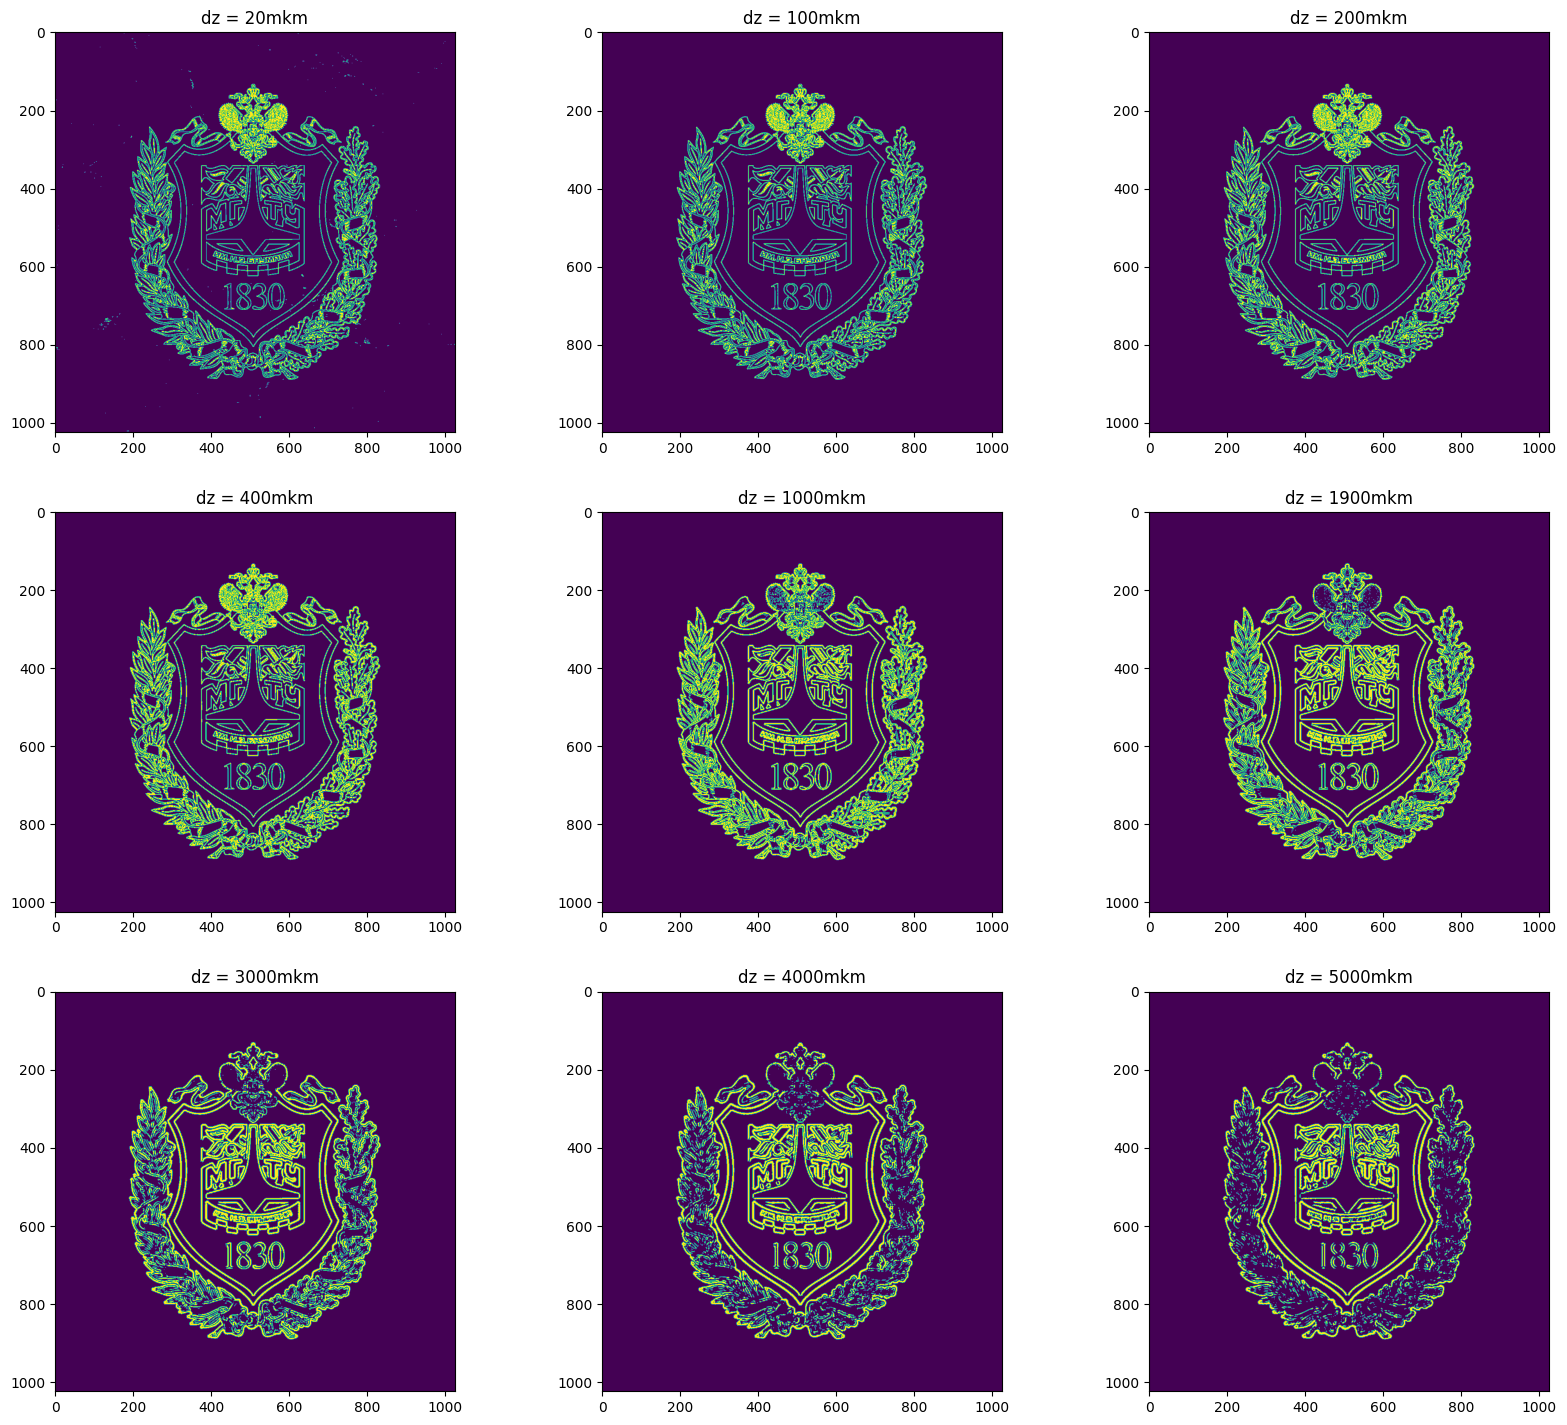

In [101]:
fig, ax_arr = plt.subplots(3, 3, figsize=(20,18), dpi=100)

ax_arr[0,0].imshow(roberts_convolved[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(roberts_convolved[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(roberts_convolved[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(roberts_convolved[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(roberts_convolved[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(roberts_convolved[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(roberts_convolved[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(roberts_convolved[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(roberts_convolved[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [102]:
def find_power(data: np.ndarray) -> int:
    return np.sum(data)

roberts_powers = {}

for dz, phase in roberts_convolved.items():
    roberts_powers[dz] = find_power(phase)
    ic(dz, roberts_powers[dz])

ic| dz: 2e-05, roberts_powers[dz]: 99956
ic| dz: 0.0001, roberts_powers[dz]: 100054
ic| dz: 0.0002, roberts_powers[dz]: 106949
ic| dz: 0.0004, roberts_powers[dz]: 122725
ic| dz: 0.001, roberts_powers[dz]: 136226
ic| dz: 0.0019, roberts_powers[dz]: 135268
ic| dz: 0.003, roberts_powers[dz]: 121813
ic| dz: 0.004, roberts_powers[dz]: 106811
ic| dz: 0.005, roberts_powers[dz]: 92440


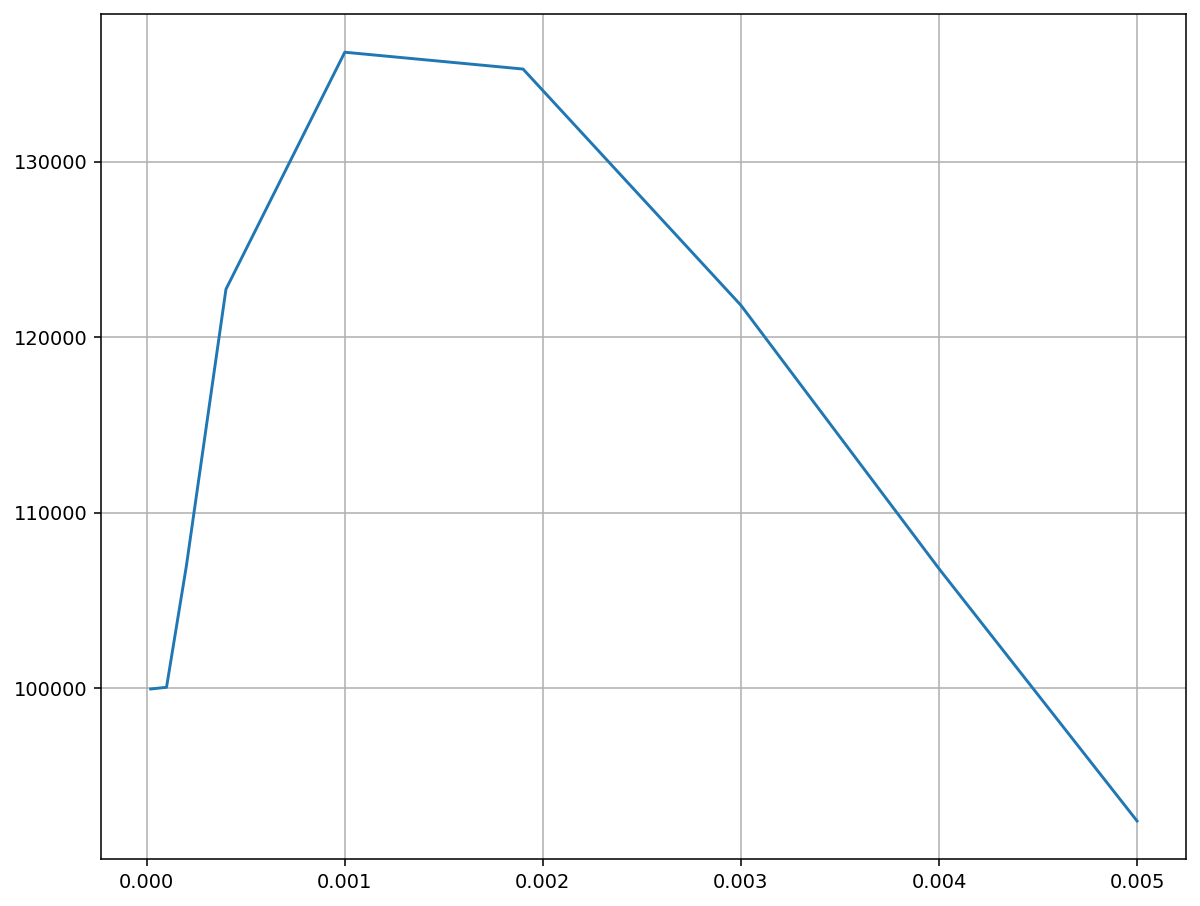

In [103]:
figure(figsize=(10, 8), dpi=140)
plt.plot(roberts_powers.keys(), roberts_powers.values())
plt.grid()
plt.show()

In [87]:
sobel_convolved = {}

for dz, phase in retrieved_phases.items():
    sobel_convolved[dz] = sobel_matrix(phase)
    ic(dz)

ic| dz: 2e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0004
ic| dz: 0.001
ic| dz: 0.0019
ic| dz: 0.003
ic| dz: 0.004
ic| dz: 0.005


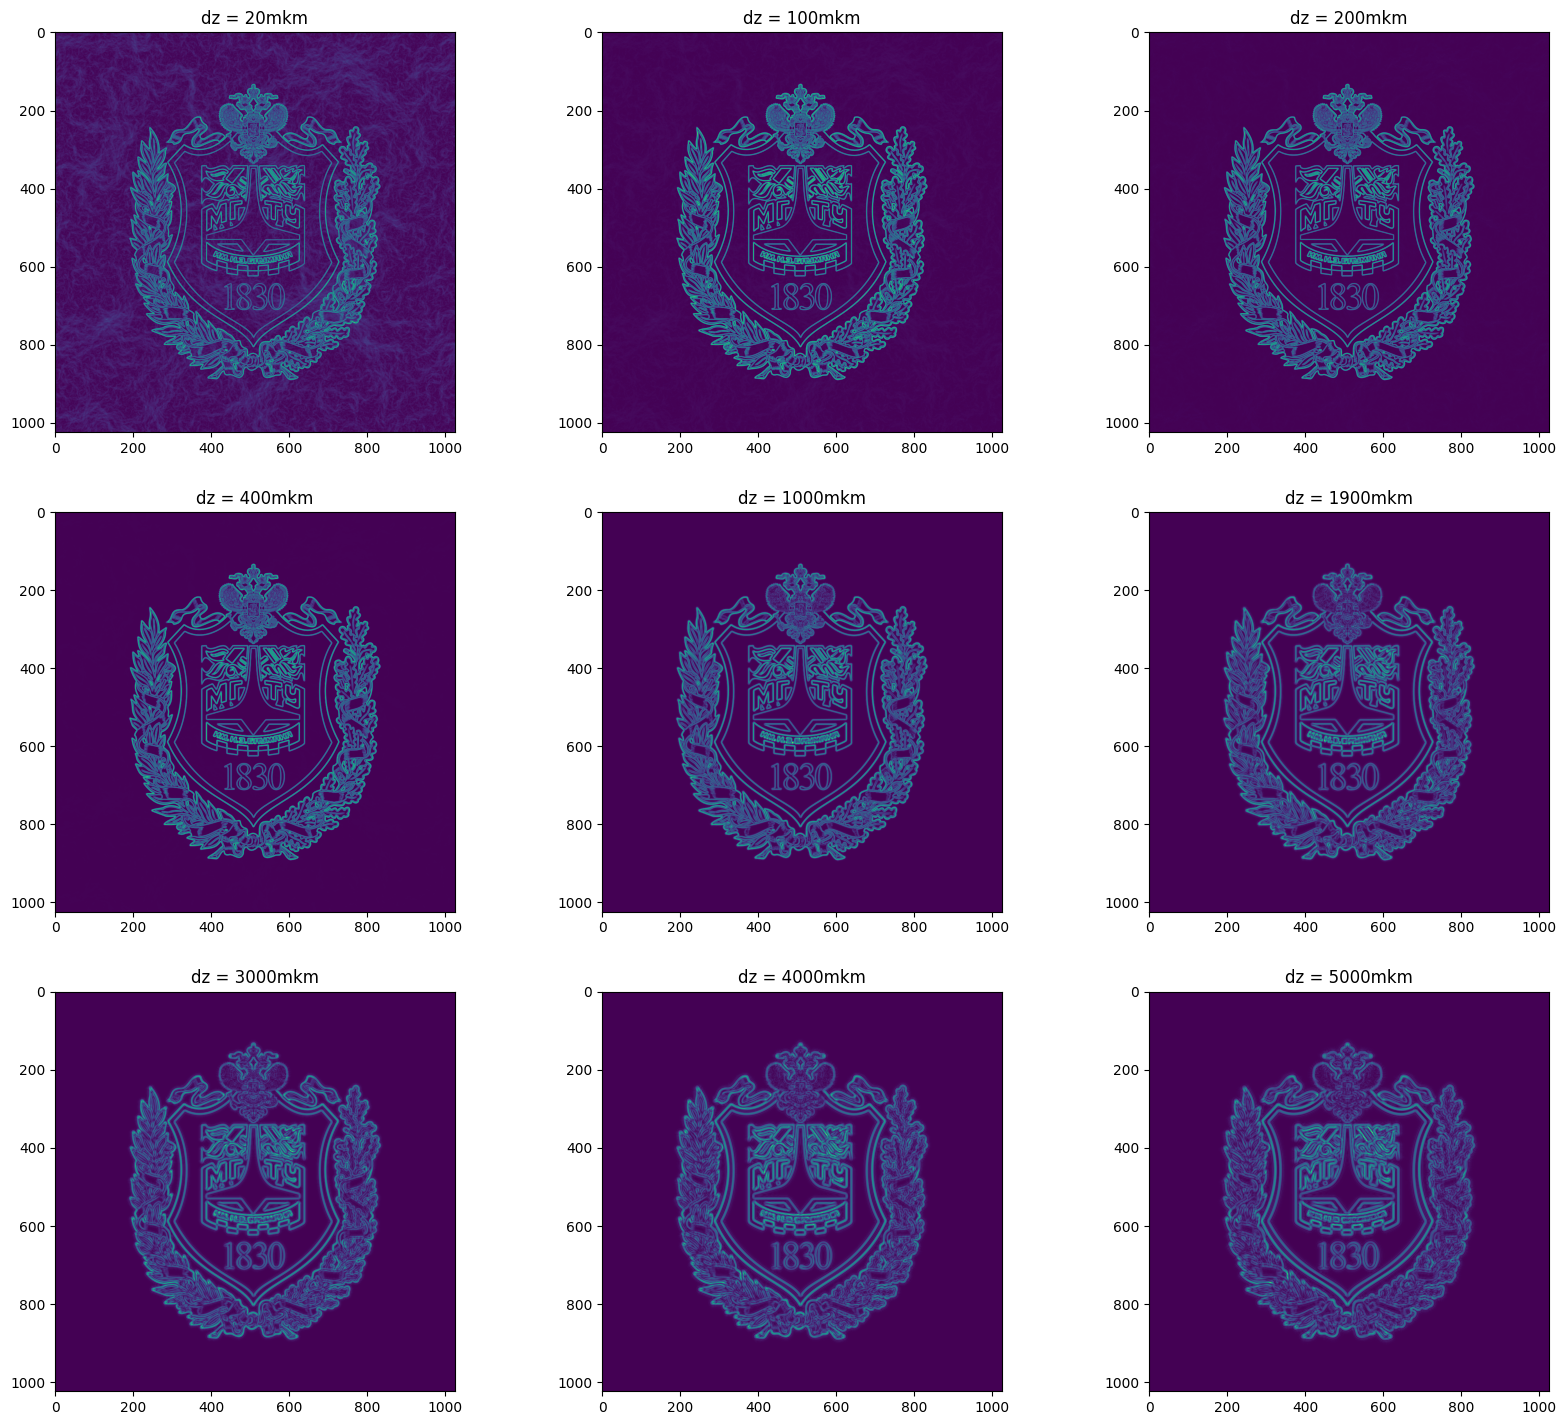

In [88]:
fig, ax_arr = plt.subplots(3, 3, figsize=(20,18), dpi=100)

ax_arr[0,0].imshow(sobel_convolved[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(sobel_convolved[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(sobel_convolved[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(sobel_convolved[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(sobel_convolved[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(sobel_convolved[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(sobel_convolved[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(sobel_convolved[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(sobel_convolved[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [90]:
def find_power(data: np.ndarray) -> int:
    return np.sum(data)

sobel_powers = {}

for dz, phase in sobel_convolved.items():
    sobel_powers[dz] = find_power(phase)
    ic(dz, sobel_powers[dz])

ic| dz: 2e-05, sobel_powers[dz]: 360623.1177844937
ic| dz: 0.0001, sobel_powers[dz]: 230061.46472883105
ic| dz: 0.0002, sobel_powers[dz]: 219420.35683405795
ic| dz: 0.0004, sobel_powers[dz]: 212628.26297799553
ic| dz: 0.001, sobel_powers[dz]: 197808.1132295026
ic| dz: 0.0019, sobel_powers[dz]: 178258.14518322653
ic| dz: 0.003, sobel_powers[dz]: 159136.6051339052
ic| dz: 0.004, sobel_powers[dz]: 145569.72539865872
ic| dz: 0.005, sobel_powers[dz]: 134472.2781235857


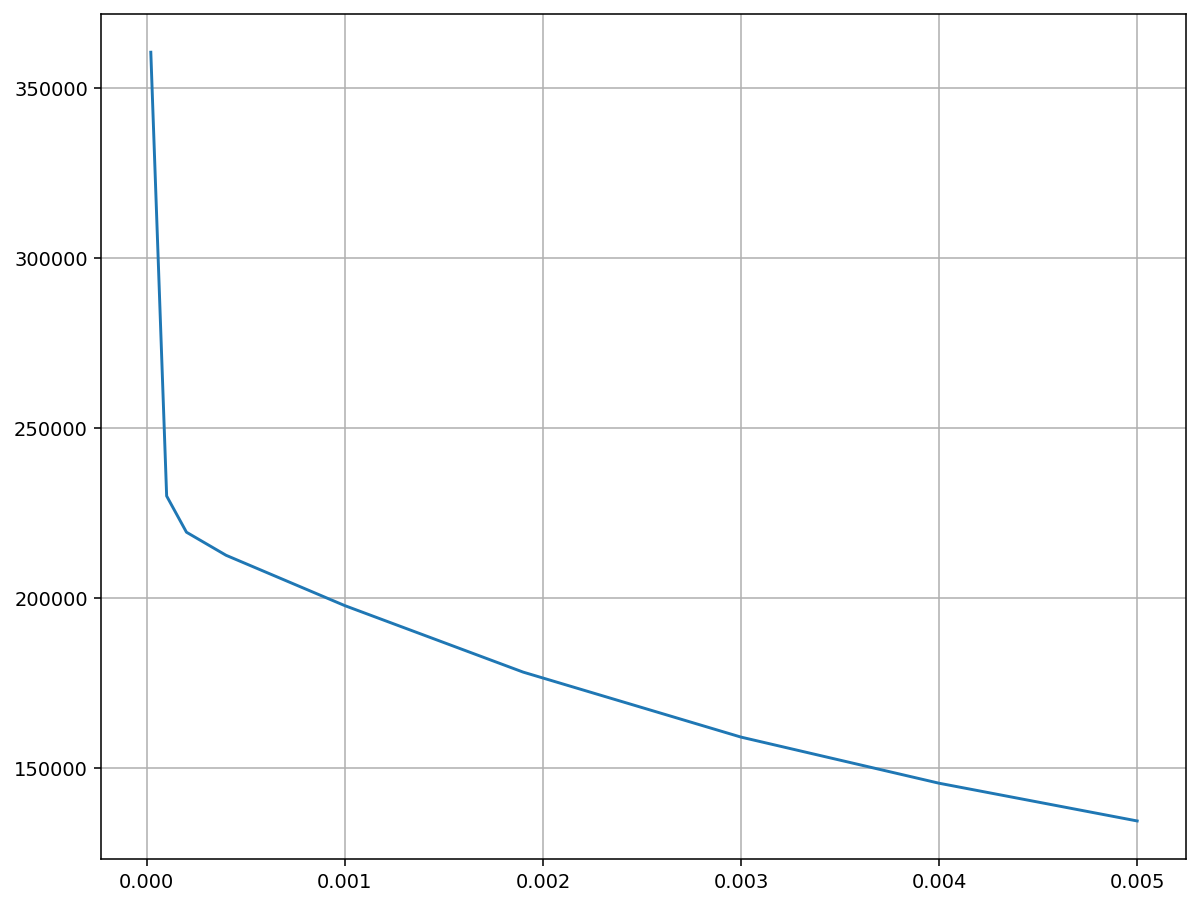

In [91]:
figure(figsize=(10, 8), dpi=140)
plt.plot(sobel_powers.keys(), sobel_powers.values())
plt.grid()
plt.show()

In [92]:
prewitt_convolved = {}

for dz, phase in retrieved_phases.items():
    prewitt_convolved[dz] = sobel_matrix(phase)
    ic(dz)

ic| dz: 2e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0004
ic| dz: 0.001
ic| dz: 0.0019
ic| dz: 0.003
ic| dz: 0.004
ic| dz: 0.005


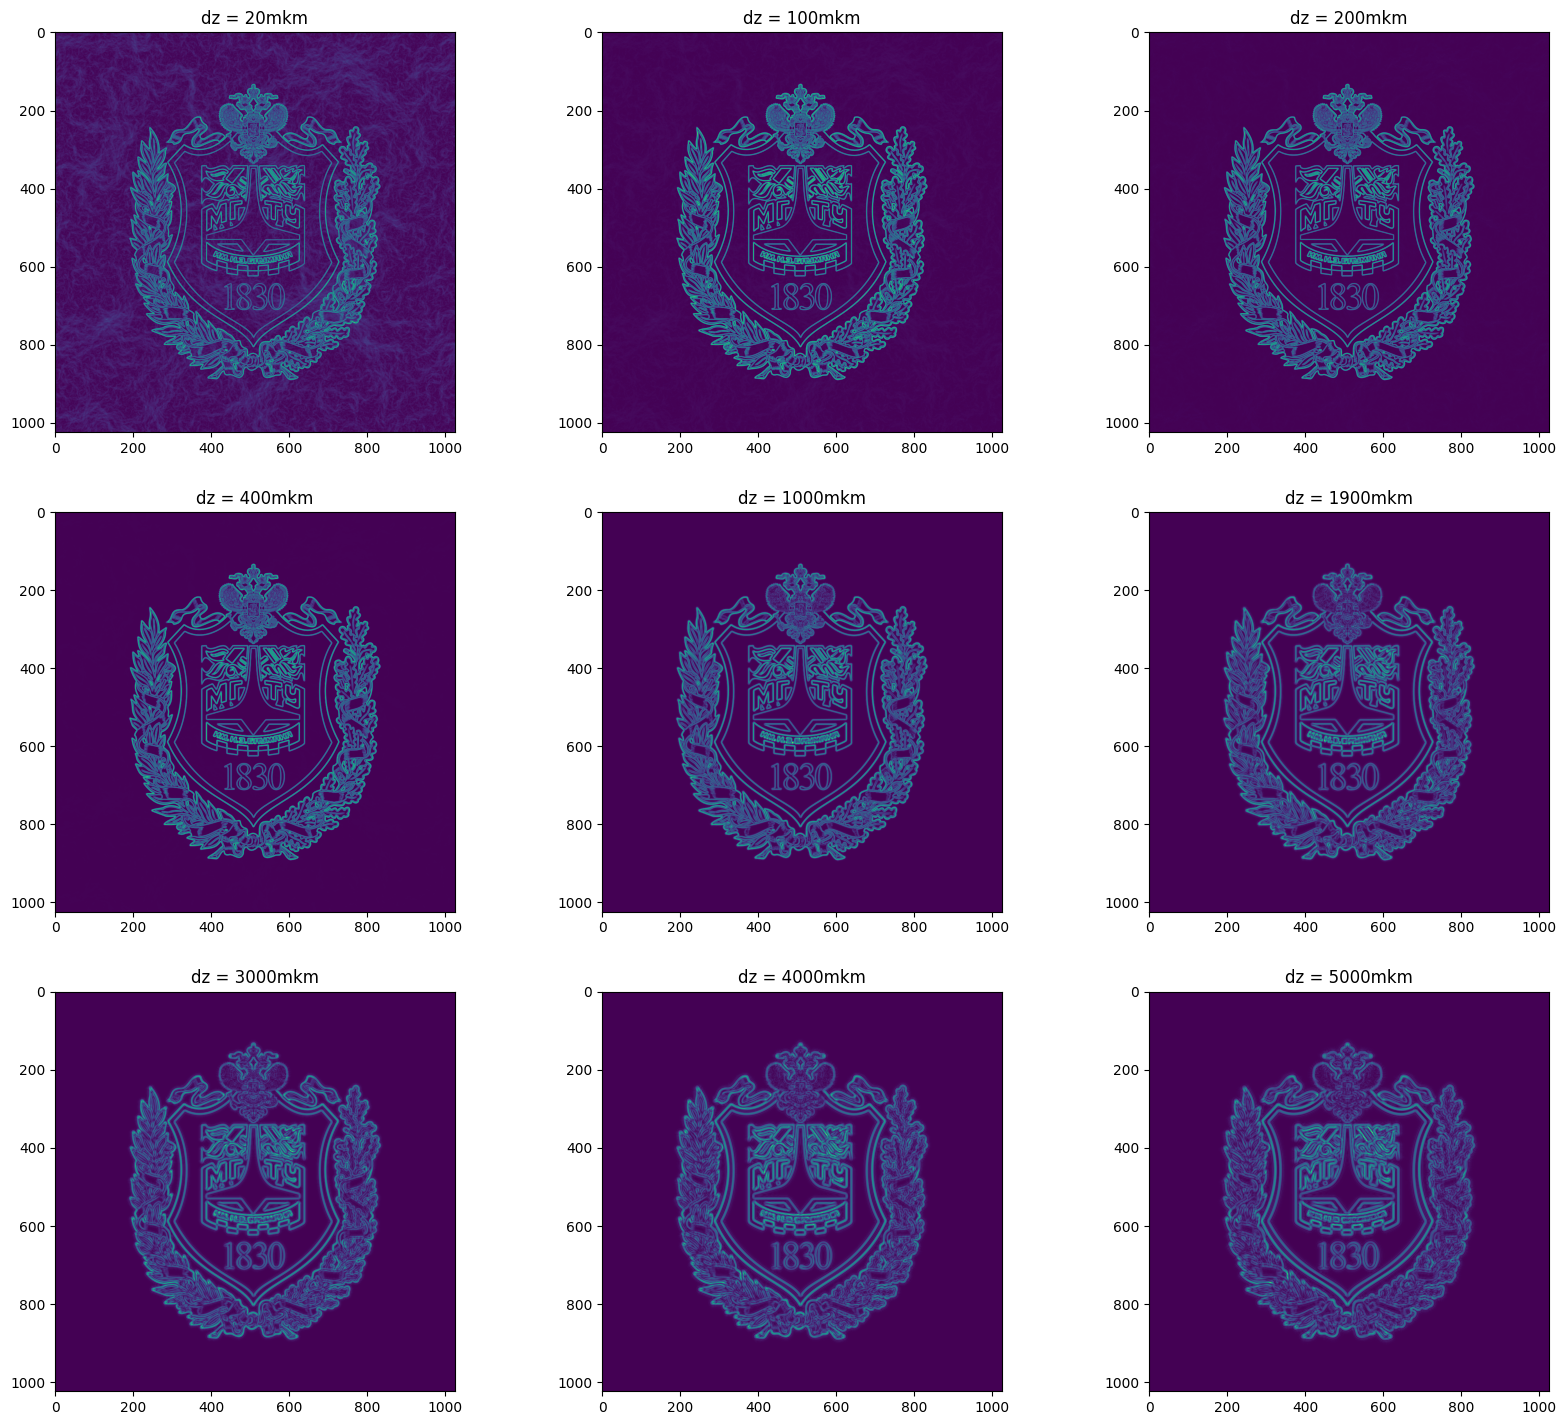

In [93]:
fig, ax_arr = plt.subplots(3, 3, figsize=(20,18), dpi=100)

ax_arr[0,0].imshow(prewitt_convolved[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(prewitt_convolved[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(prewitt_convolved[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(prewitt_convolved[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(prewitt_convolved[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(prewitt_convolved[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(prewitt_convolved[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(prewitt_convolved[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(prewitt_convolved[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [94]:
def find_power(data: np.ndarray) -> int:
    return np.sum(data)

prewitt_powers = {}

for dz, phase in prewitt_convolved.items():
    prewitt_powers[dz] = find_power(phase)
    ic(dz, prewitt_powers[dz])

ic| dz: 2e-05, prewitt_powers[dz]: 360623.1177844937
ic| dz: 0.0001, prewitt_powers[dz]: 230061.46472883105
ic| dz: 0.0002, prewitt_powers[dz]: 219420.35683405795
ic| dz: 0.0004, prewitt_powers[dz]: 212628.26297799553
ic| dz: 0.001, prewitt_powers[dz]: 197808.1132295026
ic| dz: 0.0019, prewitt_powers[dz]: 178258.14518322653
ic| dz: 0.003, prewitt_powers[dz]: 159136.6051339052
ic| dz: 0.004, prewitt_powers[dz]: 145569.72539865872
ic| dz: 0.005, prewitt_powers[dz]: 134472.2781235857


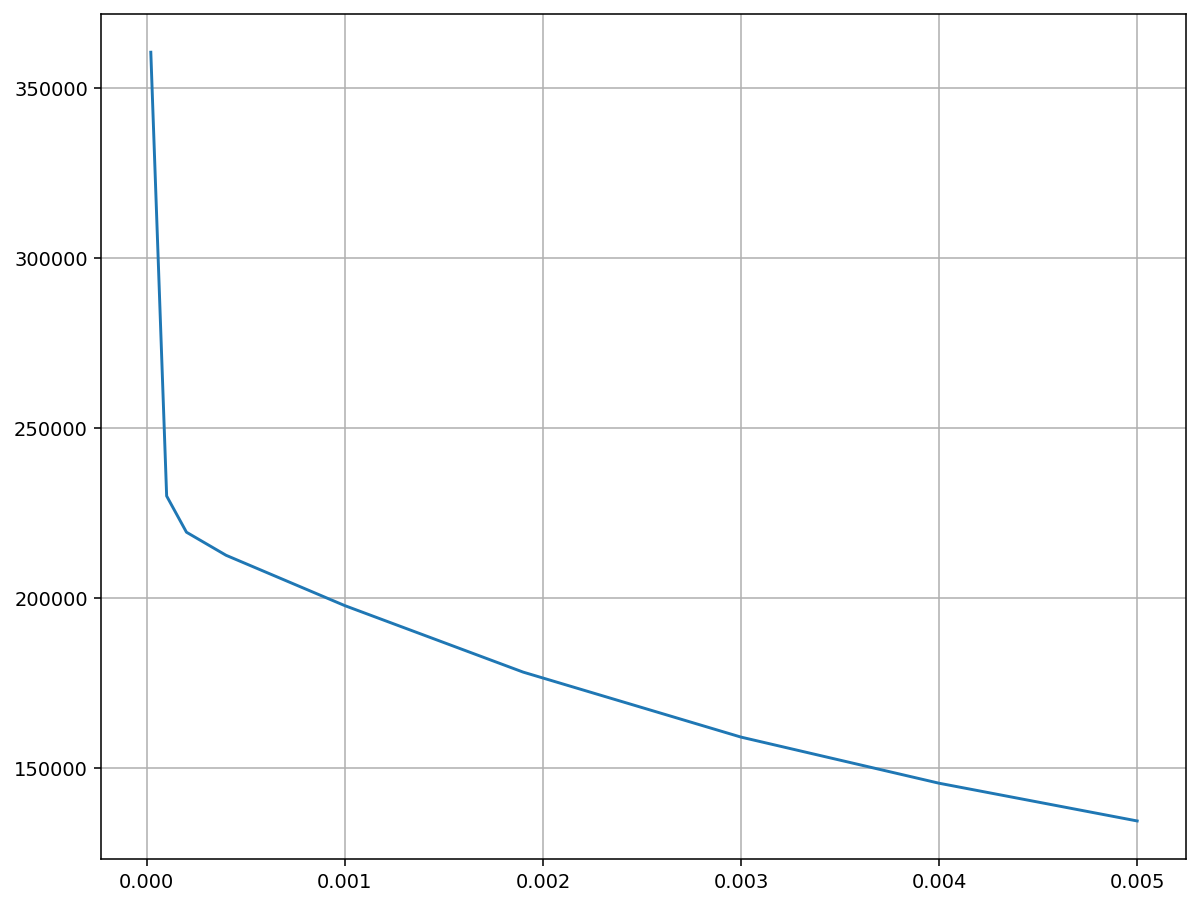

In [95]:
figure(figsize=(10, 8), dpi=140)
plt.plot(prewitt_powers.keys(), prewitt_powers.values())
plt.grid()
plt.show()

In [106]:
laplace_convolved = {}

for dz, phase in retrieved_phases.items():
    laplace_convolved[dz] = laplace_matrix(phase)
    ic(dz)

ic| dz: 2e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0004
ic| dz: 0.001
ic| dz: 0.0019
ic| dz: 0.003
ic| dz: 0.004
ic| dz: 0.005


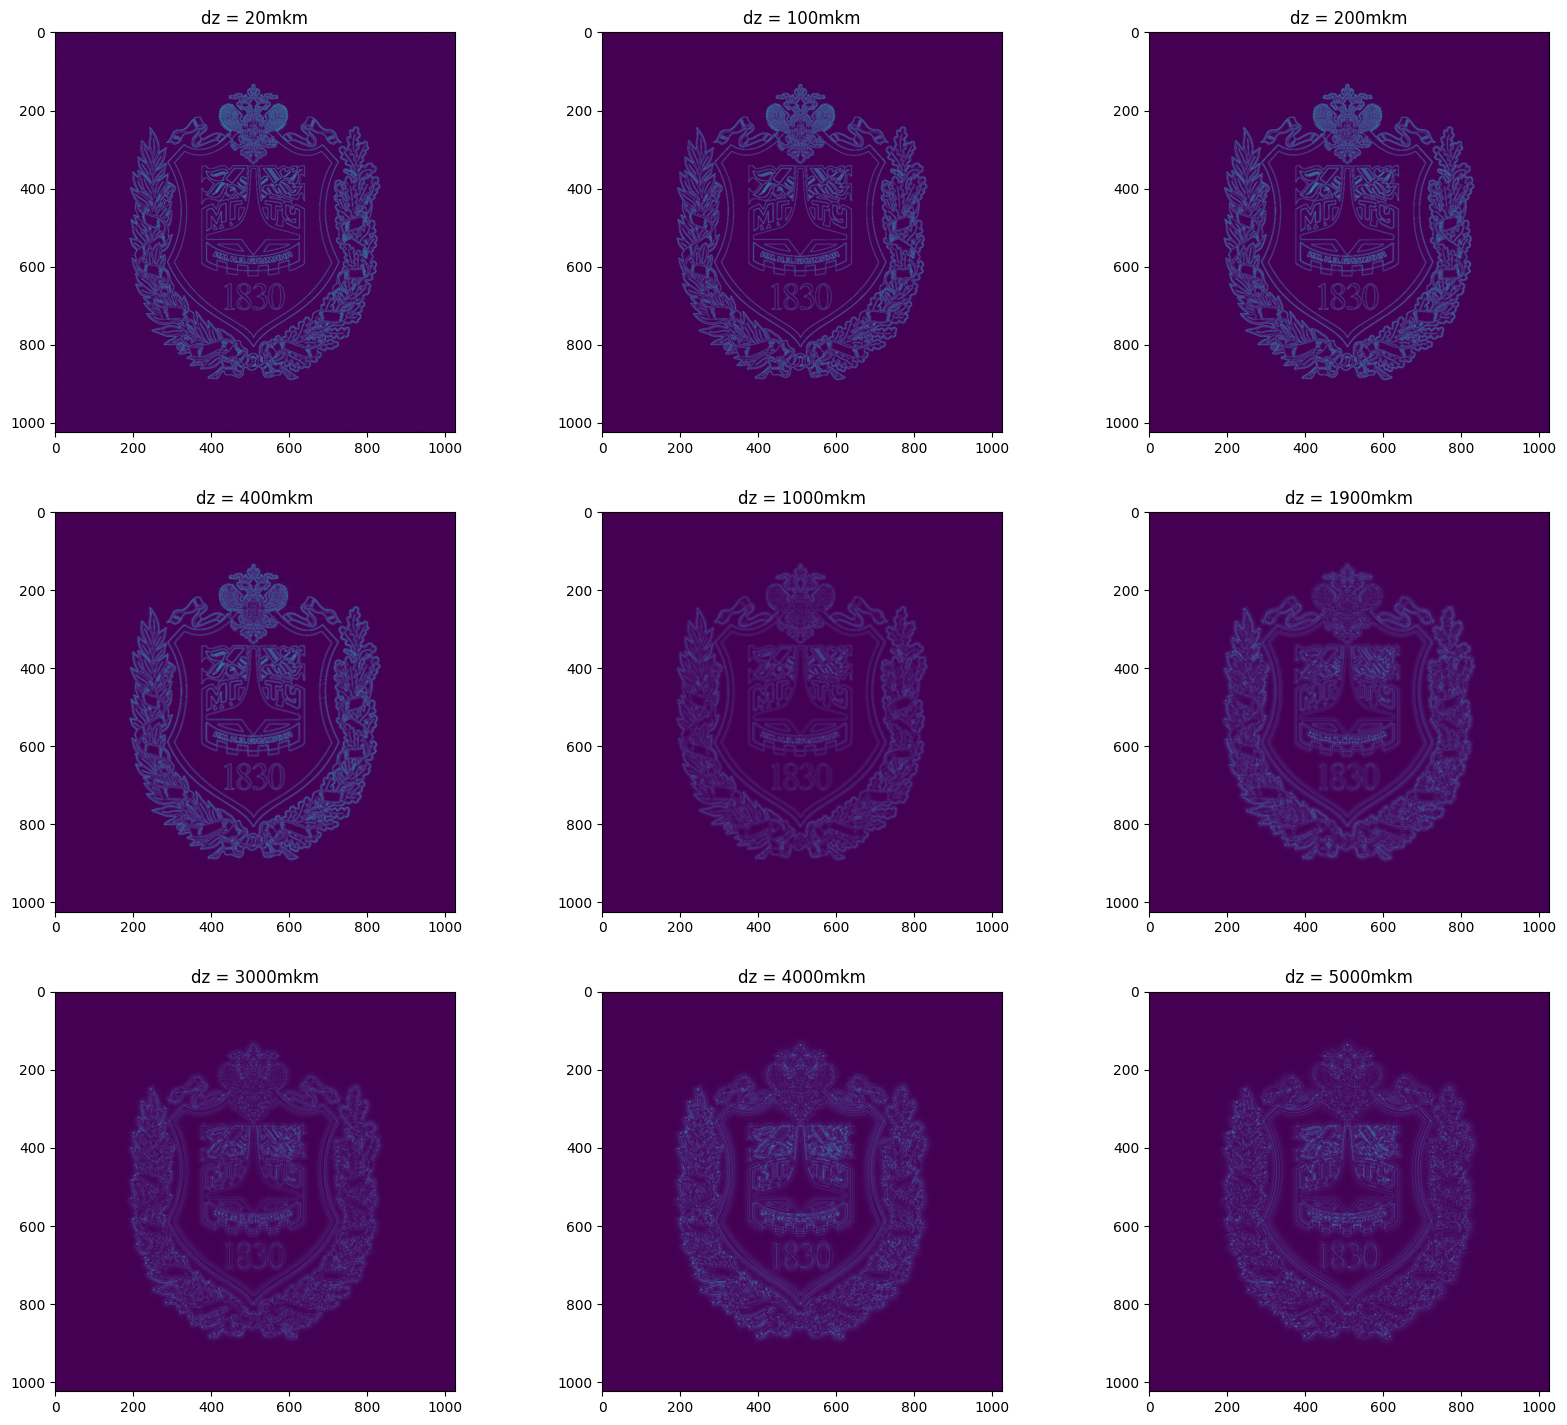

In [107]:
fig, ax_arr = plt.subplots(3, 3, figsize=(20,18), dpi=100)

ax_arr[0,0].imshow(laplace_convolved[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(laplace_convolved[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(laplace_convolved[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(laplace_convolved[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(laplace_convolved[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(laplace_convolved[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(laplace_convolved[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(laplace_convolved[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(laplace_convolved[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [98]:
def find_power(data: np.ndarray) -> int:
    return np.sum(data)

laplace_powers = {}

for dz, phase in laplace_convolved.items():
    laplace_powers[dz] = find_power(phase)
    ic(dz, laplace_powers[dz])

ic| dz: 2e-05, laplace_powers[dz]: 63956.54903546321
ic| dz: 0.0001, laplace_powers[dz]: 53099.88795316898
ic| dz: 0.0002, laplace_powers[dz]: 49707.96393443264
ic| dz: 0.0004, laplace_powers[dz]: 40860.38735902375
ic| dz: 0.001, laplace_powers[dz]: 27446.53015829074
ic| dz: 0.0019, laplace_powers[dz]: 18655.64052632611
ic| dz: 0.003, laplace_powers[dz]: 13588.659820605308
ic| dz: 0.004, laplace_powers[dz]: 11039.374210320595
ic| dz: 0.005, laplace_powers[dz]: 9348.031133666722


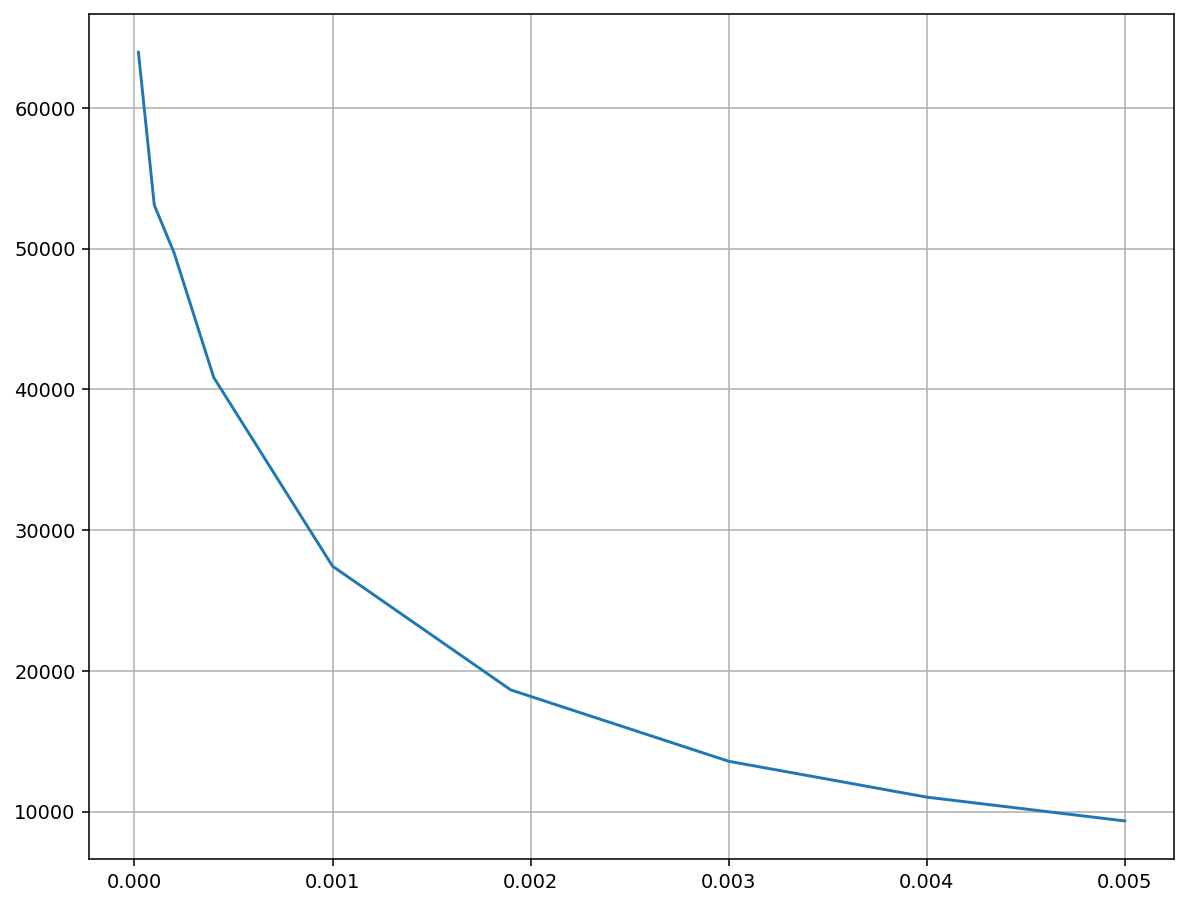

In [99]:
figure(figsize=(10, 8), dpi=140)
plt.plot(laplace_powers.keys(), laplace_powers.values())
plt.grid()
plt.show()